In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
print()

print(diabetes_data.describe())
print("\n")

print('데이터 세트 Null 값 갯수 ',diabetes_data.isnull().sum().sum(), "\n")

Outcome
0    500
1    268
Name: count, dtype: int64

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760

In [2]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    
    accuracy = accuracy_score(y_test , pred)
    
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion, "\n")
    
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc), "\n")


def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [3]:
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# # StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
# scaler = StandardScaler( )
# X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
# 의사결정나무는 입력 변수들의 상대적인 크기나 범위에 크게 영향을 받지 않는다.
# 이는 트리 기반 모델의 특성 
# 의사결정나무는 입력 변수들을 특정 임계값을 기준으로 분할하여 의사결정을 내리기 때문에
# 변수들의 스케일이 달라져도 그 기준이 되는 임계값이 함께 조정되어 모델의 성능에는 큰 영향을 미치지 않습니다.

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.6558441558441559


In [7]:
from sklearn.tree import export_graphviz

# 클래스 이름 지정
class_names = ['Not Diabetic', 'Diabetic']

# 특성 이름 지정
feature_names = diabetes_data.columns.drop('Outcome')

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt, out_file="tree.dot", class_names=class_names, \
                feature_names=feature_names, impurity=True, filled=True)

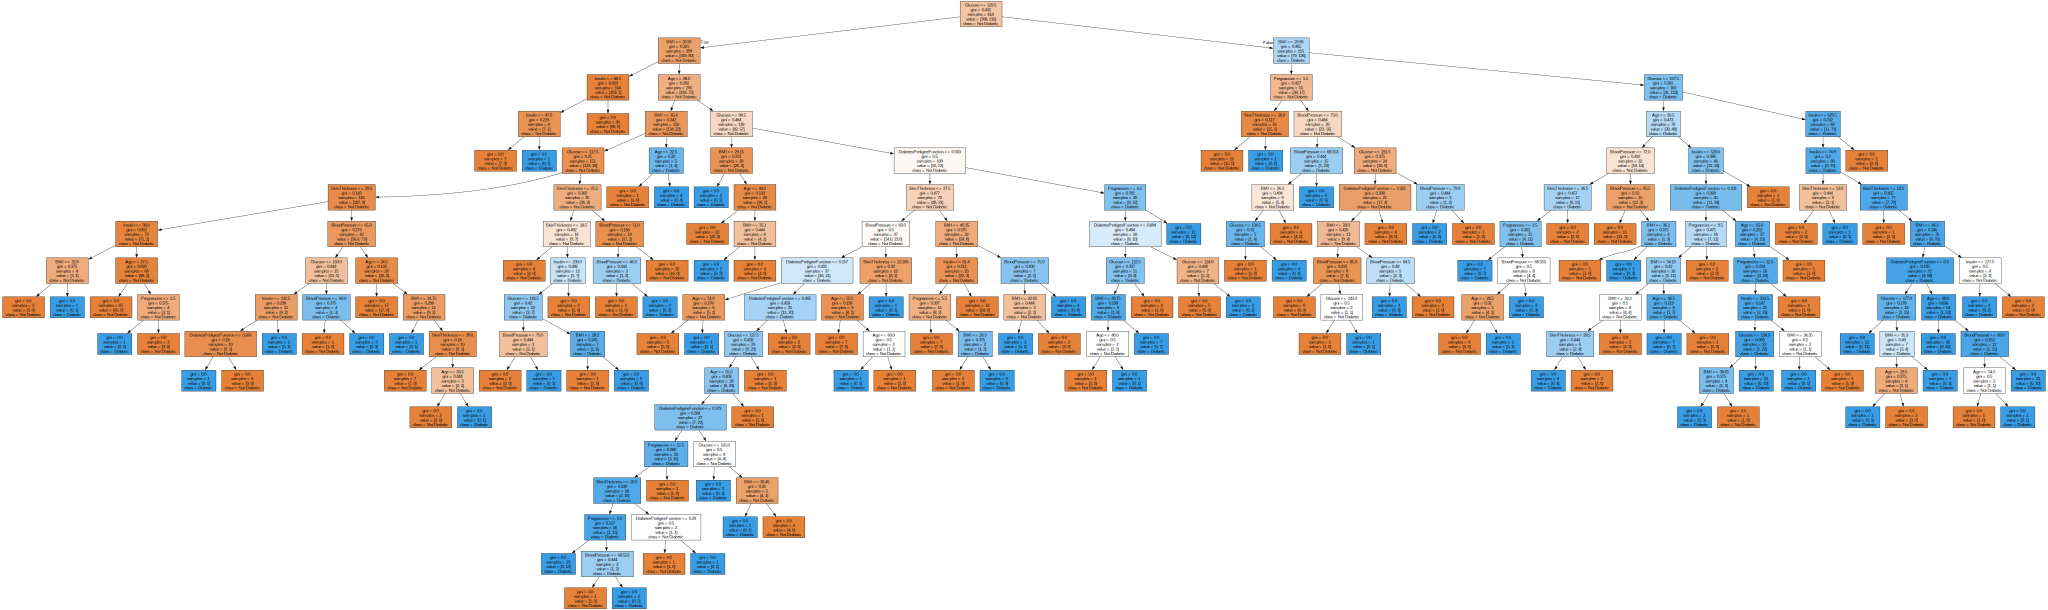

In [8]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 맨 위의 노드 => 루트 노드
# 노드는 훈련 데이터의 특성에 대한 테스트를 표현

In [9]:
dt.feature_importances_

array([0.06130091, 0.29433221, 0.11558179, 0.06838615, 0.05461859,
       0.22843059, 0.06322347, 0.11412629])

Feature importances:
[0.061 0.294 0.116 0.068 0.055 0.228 0.063 0.114] 

Pregnancies : 0.061
Glucose : 0.294
BloodPressure : 0.116
SkinThickness : 0.068
Insulin : 0.055
BMI : 0.228
DiabetesPedigreeFunction : 0.063
Age : 0.114


<Axes: ylabel='None'>

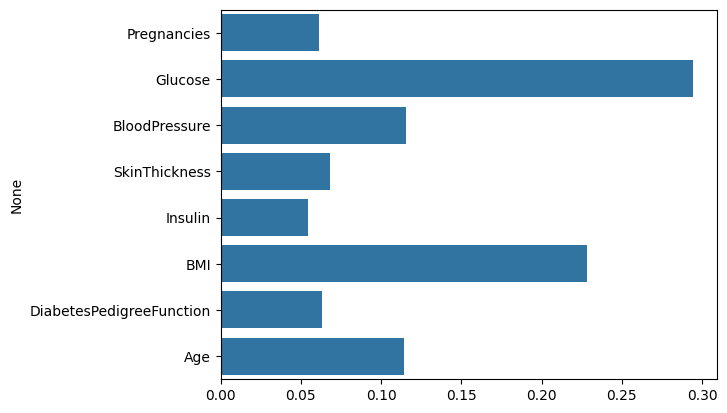

In [10]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt.feature_importances_, 3)), "\n")

# feature별 importance 매핑
for name, value in zip(feature_names , dt.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt.feature_importances_ , y=feature_names)

In [11]:
# 과대 적합
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.6558441558441559


> - 트리의 최대 깊이(max_depth)를 낮추거나
> - 최소 샘플 수(min_samples_split, min_samples_leaf)를 늘리는 등 모델의 복잡도를 낮추는 방법
> - L1 또는 L2 정규화를 통해 모델 파라미터의 복잡도를 제한
> - 앙상블 기법(Random Forest, Gradient Boosting 등)을 사용하여 개별 모델의 과대적합을 완화
> - ...

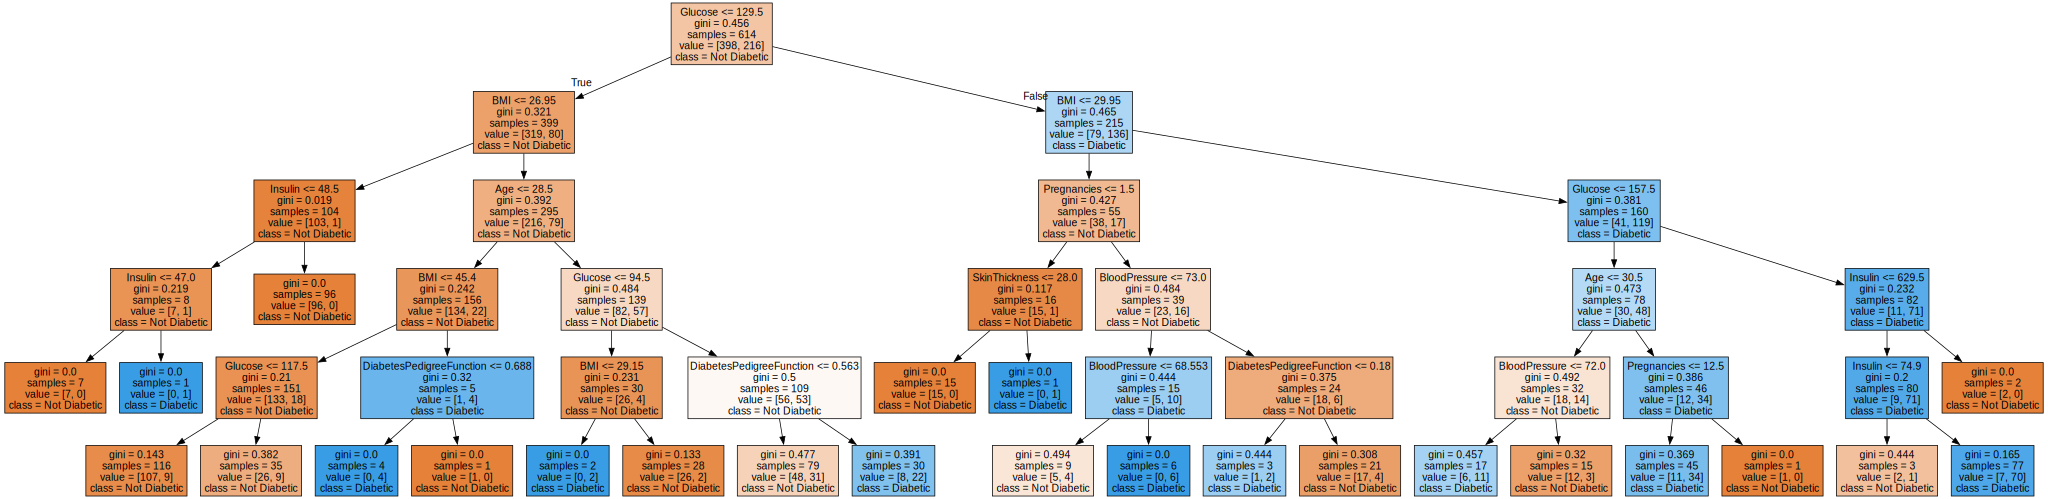

In [12]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)


# 클래스 이름 지정
class_names = ['Not Diabetic', 'Diabetic']

# 특성 이름 지정
feature_names = diabetes_data.columns.drop('Outcome')

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt, out_file="tree.dot", class_names=class_names, \
                feature_names=feature_names, impurity=True, filled=True)


# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.027 0.458 0.061 0.013 0.049 0.236 0.055 0.1  ] 

Pregnancies : 0.027
Glucose : 0.458
BloodPressure : 0.061
SkinThickness : 0.013
Insulin : 0.049
BMI : 0.236
DiabetesPedigreeFunction : 0.055
Age : 0.100


<Axes: ylabel='None'>

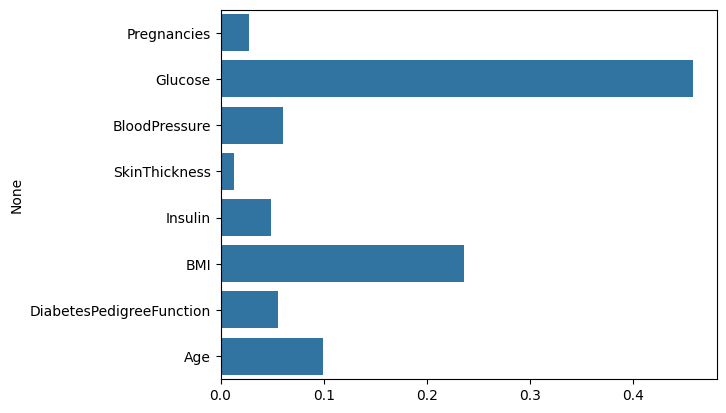

In [13]:
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt.feature_importances_, 3)), "\n")

# feature별 importance 매핑
for name, value in zip(feature_names , dt.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 

sns.barplot(x=dt.feature_importances_ , y=feature_names)

In [14]:
# 훈련 데이터 정확도와 테스트 데이터 정확도 간 차이가 5~10% 정도면 적절한 수준의 일반화 성능을 보인다고 볼 수 있다.
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.8436482084690554
0.7792207792207793


#### 회기 모델일 경우 KFold 분할기
#### 분류 모델일 경우 타깃을 골고루 나누기 위해 StratifiedFKold

> - splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
> - cross_validate(dt, X_train, y_train, cv=splitter)


#### min_impurity_decrease
> - 의사결정나무 모델은 데이터를 분할하여 트리 구조를 만드는데, 이때 분할 기준으로 사용되는 것이 불순도(impurity) 감소량
> - 불순도 감소량이 클수록 더 좋은 분할 기준
> - 노드를 분할할 때 최소한의 불순도 감소량을 지정하는 것
> - 즉, 이 값 보다 불순도 감소량이 작으면 노드를 더 이상 분할하지 않는다.


#### min_sample_split
> - 노드를 분할하기 위한 최소 샘플 수를 지정하는 것
> - 즉, 이 값보다 적은 수의 샘플이 포함된 노드는 더 이상 분할되지 않는다.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

dt = DecisionTreeClassifier()

# 탐색할 하이퍼 파라미터 범위 설정
param_grid = {
    'max_depth': range(1, 20, 1)
    # 'min_samples_split': range(2, 100, 10)
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
# cv=5 -> 5-fold 교차 검증, 보통 5 또는 10-폴드 교차 검증을 많이 사용한다.

# 학습 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 4}


In [16]:
# 훈련 데이터 성능 평가
print("Train Accuracy:", grid_search.score(X_train, y_train))

# 테스트 데이터 성능 평가 
print("Test Accuracy:", grid_search.score(X_test, y_test))

Train Accuracy: 0.8013029315960912
Test Accuracy: 0.7077922077922078


#### GridSearchCV 객체의 주요 속성:
> - grid_search.best_params_: 최적의 하이퍼파라미터 조합
> - grid_search.best_score_: 최적의 하이퍼파라미터 조합의 교차 검증 평균 점수
> - grid_search.cv_results_: 각 하이퍼파라미터 조합의 교차 검증 결과

#### grid_search.cv_results_에는 다음과 같은 정보가 담겨있다:
> - 'params': 각 하이퍼파라미터 조합
> - 'mean_test_score': 각 하이퍼파라미터 조합의 교차 검증 평균 점수
> - 'std_test_score': 각 하이퍼파라미터 조합의 교차 검증 점수 표준편차

In [17]:
for max_depth, mean_test_score in zip(grid_search.cv_results_['param_max_depth'], grid_search.cv_results_['mean_test_score']):
    print(f"max_depth = {max_depth}")
    print(f"mean_test_score = {mean_test_score}", "\n\n")

max_depth = 1
mean_test_score = 0.7214980674396907 


max_depth = 2
mean_test_score = 0.7410769025723044 


max_depth = 3
mean_test_score = 0.7361988537918165 


max_depth = 4
mean_test_score = 0.7475676396108224 


max_depth = 5
mean_test_score = 0.7394508863121417 


max_depth = 6
mean_test_score = 0.7394642143142743 


max_depth = 7
mean_test_score = 0.7312275089964014 


max_depth = 8
mean_test_score = 0.7083699853391976 


max_depth = 9
mean_test_score = 0.6904971344795414 


max_depth = 10
mean_test_score = 0.698613887778222 


max_depth = 11
mean_test_score = 0.6986138877782221 


max_depth = 12
mean_test_score = 0.6970145275223244 


max_depth = 13
mean_test_score = 0.6807676929228309 


max_depth = 14
mean_test_score = 0.6937891510062641 


max_depth = 15
mean_test_score = 0.6937891510062641 


max_depth = 16
mean_test_score = 0.6905904304944689 


max_depth = 17
mean_test_score = 0.6856457417033186 


max_depth = 18
mean_test_score = 0.6921764627482341 


max_depth = 19
mean_

#### max_depth가 5일 때 일반화된 점수를 보여주지만 9일 때는 과대적합된 점수를 보여준다.
> - GridSearchCV는 교차 검증을 통해 평균 테스트 점수가 가장 높은 하이퍼파라미터 값을 찾는다.
> - max_depth=9일 때 평균 테스트 점수가 0.732880181260829로 가장 높다.
> - 따라서 GridSearchCV는 max_depth=9를 최적의 하이퍼파라미터 값으로 선택.

#### 그러나 실제 테스트 데이터 점수를 보면 max_depth=5일 때가 0.7207792207792207로 더 높다.
> - GridSearchCV는 교차 검증 점수를 기준으로 최적의 하이퍼파라미터를 선택하지만, 실제 테스트 데이터 점수와는 차이가 있을 수 있다.
> - 과대적합을 막기 위해서는 모델의 복잡도를 적절히 조절하는 것이 중요한데, max_depth=9는 과도하게 복잡한 모델일 수 있다.
> - 따라서 실제 테스트 데이터 점수를 기준으로 볼 때, max_depth=5가 더 적절한 선택

> - 결론적으로, GridSearchCV가 찾은 최적의 하이퍼파라미터 값과 실제 테스트 데이터 점수를 기준으로 한 최적의 하이퍼파라미터 값이 다를 수 있다.
> - 이런 경우에는 최종적으로 테스트 데이터 점수를 기준으로 판단하는 것이 중요

#### 의사결정나무 모델은 데이터를 분할하여 트리 구조를 만드는데, 이때 분할 기준으로 사용되는 것이 불순도(impurity) 감소량
> - 불순도 감소량이 클수록 더 좋은 분할 기준
> - min_impurity_decrease와 같은 임계값 관련 하이퍼파라미터가 중요한 역할
> - 이 파라미터를 통해 과적합을 방지하고 트리의 복잡도를 적절히 조절
> - 따라서 의사결정나무 모델에서는 임계값 설정이 중요한 요소

[0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0] 

오차 행렬
[[91 11]
 [22 30]] 

정확도: 0.7857, 정밀도: 0.7317, 재현율: 0.5769,    F1: 0.6452, AUC:0.7837 



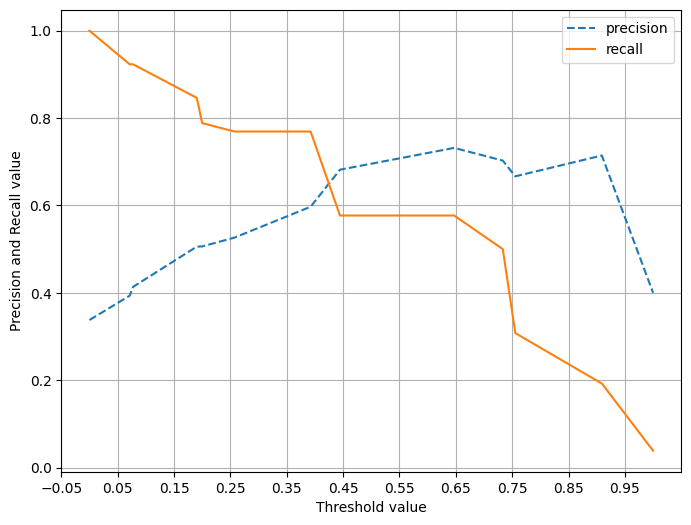

0.8436482084690554
0.7857142857142857


In [18]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(pred, "\n")

pred_proba = dt.predict_proba(X_test)[:, 1] # 분류 결정 예측 확률

get_clf_eval(y_test , pred, pred_proba)

precision_recall_curve_plot(y_test, pred_proba)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

> - DecisionTreeClassifier는 내부적으로 임계값을 사용하지만 이 값을 직접 조절할 수 있는 매개변수는 없다.
> - 대신 정보이득 등의 기준을 사용하여 최적의 분할 지점을 자동으로 찾는다.
> - 하지만 실제 문제에서는 상황에 따라 정밀도와 재현율의 균형을 다르게 맞춰야 할 수 있다. 이를 위해서는 임계값을 직접 조절할 수 있어야 한다.
> - precision_recall_curve 함수를 사용하면 다양한 임계값에 대한 정밀도와 재현율을 확인할 수 있어, 문제에 맞는 최적의 임계값을 선택할 수 있다.
> - DecisionTreeClassifier 자체에는 임계값 매개변수가 없지만, 외부 함수를 사용하여 임계값 조절 및 분석이 가능

> - F1 점수 0.8 이상 : 매우 좋은 성능
> - F1 점수 0.7 ~ 0.8 : 좋은 성능, 의료 쪽에선 0.8 이상이 바람직
> - F1 점수 0.6 ~ 0.7 : 보통 성능
> - F1 점수 0.5 ~ 0.6 : 낮은 성능
> - F1 점수 0.5 미만 : 매우 낮은 성능

In [19]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    binarizer = Binarizer(threshold=threshold).fit(pred_proba_c1) 
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', threshold)
    get_clf_eval(y_test, custom_predict, pred_proba_c1)
    print("\n")

In [20]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]

pred_proba = dt.predict_proba(X_test)

for threshold in thresholds:
    y_pred = (pred_proba[:, 1] > threshold).astype(int)
    get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), threshold)

임곗값: 0.3
오차 행렬
[[75 27]
 [12 40]] 

정확도: 0.7468, 정밀도: 0.5970, 재현율: 0.7692,    F1: 0.6723, AUC:0.7837 



임곗값: 0.33
오차 행렬
[[75 27]
 [12 40]] 

정확도: 0.7468, 정밀도: 0.5970, 재현율: 0.7692,    F1: 0.6723, AUC:0.7837 



임곗값: 0.36
오차 행렬
[[75 27]
 [12 40]] 

정확도: 0.7468, 정밀도: 0.5970, 재현율: 0.7692,    F1: 0.6723, AUC:0.7837 



임곗값: 0.39
오차 행렬
[[75 27]
 [12 40]] 

정확도: 0.7468, 정밀도: 0.5970, 재현율: 0.7692,    F1: 0.6723, AUC:0.7837 



임곗값: 0.42
오차 행렬
[[88 14]
 [22 30]] 

정확도: 0.7662, 정밀도: 0.6818, 재현율: 0.5769,    F1: 0.6250, AUC:0.7837 



임곗값: 0.45
오차 행렬
[[91 11]
 [22 30]] 

정확도: 0.7857, 정밀도: 0.7317, 재현율: 0.5769,    F1: 0.6452, AUC:0.7837 



임곗값: 0.48
오차 행렬
[[91 11]
 [22 30]] 

정확도: 0.7857, 정밀도: 0.7317, 재현율: 0.5769,    F1: 0.6452, AUC:0.7837 



임곗값: 0.5
오차 행렬
[[91 11]
 [22 30]] 

정확도: 0.7857, 정밀도: 0.7317, 재현율: 0.5769,    F1: 0.6452, AUC:0.7837 





In [21]:
dt = DecisionTreeClassifier(random_state=42, max_depth=9)

dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(pred, "\n")

pred_proba = dt.predict_proba(X_test)[:, 1] # 분류 결정 예측 확률

get_clf_eval(y_test , pred, pred_proba)

[0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0
 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0] 

오차 행렬
[[73 29]
 [21 31]] 

정확도: 0.6753, 정밀도: 0.5167, 재현율: 0.5962,    F1: 0.5536, AUC:0.6320 



In [22]:
thresholds = [0.15, 0.25, 0.35]
# 임계값은 모델이 예측한 클래스 1(True)에 대한 확률이 얼마 이상일 때 해당 샘플을 클래스 1로 분류할 것인지를 결정하는 기준값

pred_proba = dt.predict_proba(X_test)
# 첫 번째 열은 클래스 0의 확률, 두 번째 열은 클래스 1의 확률
# print(pred_proba)

for threshold in thresholds:
    y_pred = (pred_proba[:, 1] > threshold).astype(int)
    get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), threshold)


print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

print(dt.n_features_in_)
print(dt.predict([[0, 75.250000,	80.000000,	32.000000,	1.250000,	36.600000,	0.626250,	41.000000]]))

임곗값: 0.15
오차 행렬
[[68 34]
 [21 31]] 

정확도: 0.6429, 정밀도: 0.4769, 재현율: 0.5962,    F1: 0.5299, AUC:0.6320 



임곗값: 0.25
오차 행렬
[[69 33]
 [21 31]] 

정확도: 0.6494, 정밀도: 0.4844, 재현율: 0.5962,    F1: 0.5345, AUC:0.6320 



임곗값: 0.35
오차 행렬
[[69 33]
 [21 31]] 

정확도: 0.6494, 정밀도: 0.4844, 재현율: 0.5962,    F1: 0.5345, AUC:0.6320 



0.9576547231270358
0.6753246753246753
8
[0]


/opt/homebrew/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
